In [130]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

os.chdir("..")

In [1]:

mind_df = pd.read_csv('data/processed/MIND_dataset/mind_small/mind_small.train.inter', sep='\t', skiprows=[0], names=['user_id', 'item_id', 'label', 'timestamp'])

mind_df.head()

NameError: name 'pd' is not defined

In [21]:
mind_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5843444 entries, 0 to 5843443
Data columns (total 4 columns):
 #   Column     Dtype
---  ------     -----
 0   user_id    int64
 1   item_id    int64
 2   label      int64
 3   timestamp  int64
dtypes: int64(4)
memory usage: 178.3 MB


In [23]:
unique_user = mind_df['user_id'].nunique()
unique_items = mind_df['item_id'].nunique()
print(f'Unique user {unique_user}, unique items {unique_items}. Total length {len(mind_df)}')

Unique user 50000, unique items 20288. Total length 5843444


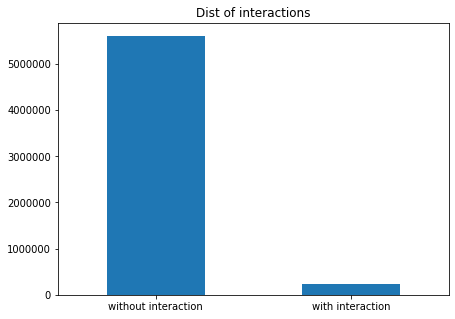

In [72]:
plt.figure(figsize=(7, 5))
ax = mind_df['label'].value_counts().plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Dist of interactions')
plt.xticks([0, 1], ['without interaction', 'with interaction'], rotation=0);

In [225]:
def plot_bar_top(labels, df, _title="Bar plot"):
    fig, ax = plt.subplots()
    ax.bar(labels, df[df['label'] == 1]['count'].values)
    ax.bar(labels, df[df['label'] == 0]['count'].values, bottom=df[df['label'] == 1]['count'].values)
    plt.title(_title)
    plt.xticks(rotation=45);


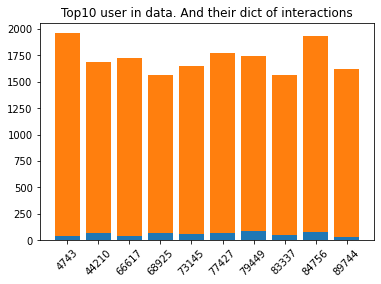

In [228]:
top_10_users = mind_df['user_id'].value_counts()[:10].index

user_and_interactions = mind_df.groupby(['user_id', 'label']).size().reset_index().rename(columns={0:'count'})
top_10_users_with_interactions = user_and_interactions[user_and_interactions['user_id'].isin(top_10_users)]

labels = top_10_users_with_interactions['user_id'][::2].astype("string").values
plot_bar_top(labels, top_10_users_with_interactions, "Top10 user in data. And their dict of interactions")

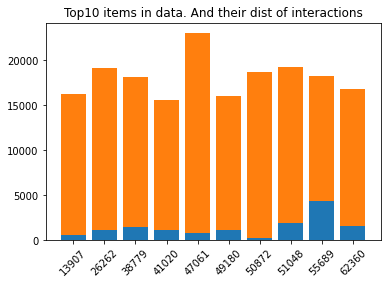

In [229]:
mind_df['item_id'].value_counts()[:10]
top_10_item = mind_df['item_id'].value_counts()[:10].index

items_and_interactions = mind_df.groupby(['item_id', 'label']).size().reset_index().rename(columns={0:'count'})
top_10_items_with_interactions = items_and_interactions[items_and_interactions['item_id'].isin(top_10_item)]
labels = top_10_items_with_interactions['item_id'][::2].astype("string").values
plot_bar_top(labels, top_10_items_with_interactions, "Top10 items in data. And their dist of interactions")


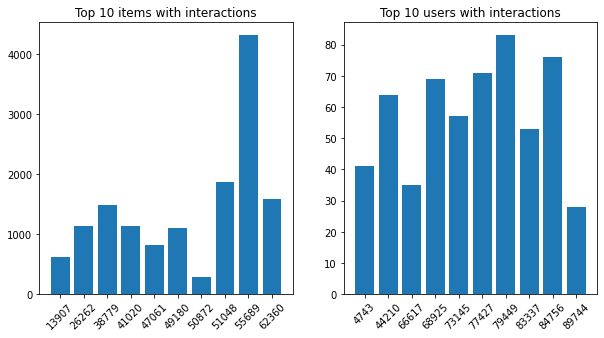

In [230]:
# Items preprocessing for plot
items_and_interactions = mind_df[mind_df["label"] == 1].groupby(['item_id', 'label']).size().reset_index().rename(columns={0:'count'})
top_10_items_with_interactions = items_and_interactions[items_and_interactions['item_id'].isin(top_10_item)]
labels1 = top_10_items_with_interactions['item_id'].astype("string").values

# User  preprocessing for plot
user_and_interactions = mind_df[mind_df["label"] == 1].groupby(['user_id', 'label']).size().reset_index().rename(columns={0:'count'})
top_10_users_with_interactions = user_and_interactions[user_and_interactions['user_id'].isin(top_10_users)]
labels2 = top_10_users_with_interactions['user_id'].astype("string").values

# plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Top 10 items with interactions')
plt.bar(labels1, top_10_items_with_interactions['count'].values)
plt.xticks(rotation=45);

plt.subplot(1, 2, 2)
plt.title('Top 10 users with interactions')
plt.bar(labels2, top_10_users_with_interactions['count'].values)
plt.xticks(rotation=45);